In [1]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import import_ipynb
# Se ignoran los "FutureWarnings" molestos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [10]:
# Read cvs file
DATASET_PATH = 'weatherAUS.csv'
dataset = pd.read_csv(DATASET_PATH)
dataset_=dataset.copy()

In [11]:
if 'Date' in dataset_.columns:
    date = dataset_['Date'].str.split(pat='-', expand = True)
    date.shape
    year = np.uint16(date[0])
    month_day = np.float32(date[1]) + np.divide(np.float32(date[2]),32)
    dataset_ = dataset_.drop('Date', 1)
    dataset_.insert(0, 'Year', year)
    dataset_.insert(1, 'MonthDay', month_day)

In [49]:
dataset__=dataset_[dataset_["Year"]!=2007]
dataset__=dataset__[dataset__["Year"]!=2008]

In [54]:
dataset__[dataset__["Year"]==2008]

,Year,MonthDay,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [50]:
for column in dataset__:
   tot=dataset__[column].isnull().sum()
   print(column,"porcentaje de Null",tot/len(dataset__[column])*100)

Year porcentaje de Null 0.0
MonthDay porcentaje de Null 0.0
Location porcentaje de Null 0.0
MinTemp porcentaje de Null 1.0298402140726197
MaxTemp porcentaje de Null 0.875434049004744
Rainfall porcentaje de Null 2.260897512034598
Evaporation porcentaje de Null 43.632667034633094
Sunshine porcentaje de Null 48.56597894207324
WindGustDir porcentaje de Null 6.897973157082073
WindGustSpeed porcentaje de Null 6.854655590411447
WindDir9am porcentaje de Null 7.317874085615074
WindDir3pm porcentaje de Null 2.937909158870669
WindSpeed9am porcentaje de Null 1.2135905372076938
WindSpeed3pm porcentaje de Null 2.126054119011521
Humidity9am porcentaje de Null 1.836804560920568
Humidity3pm porcentaje de Null 3.132838208888485
Pressure9am porcentaje de Null 10.459096339665615
Pressure3pm porcentaje de Null 10.433944204179447
Cloud9am porcentaje de Null 38.782496908383344
Cloud3pm porcentaje de Null 41.199896596776334
Temp9am porcentaje de Null 1.221275911939579
Temp3pm porcentaje de Null 2.510322855605

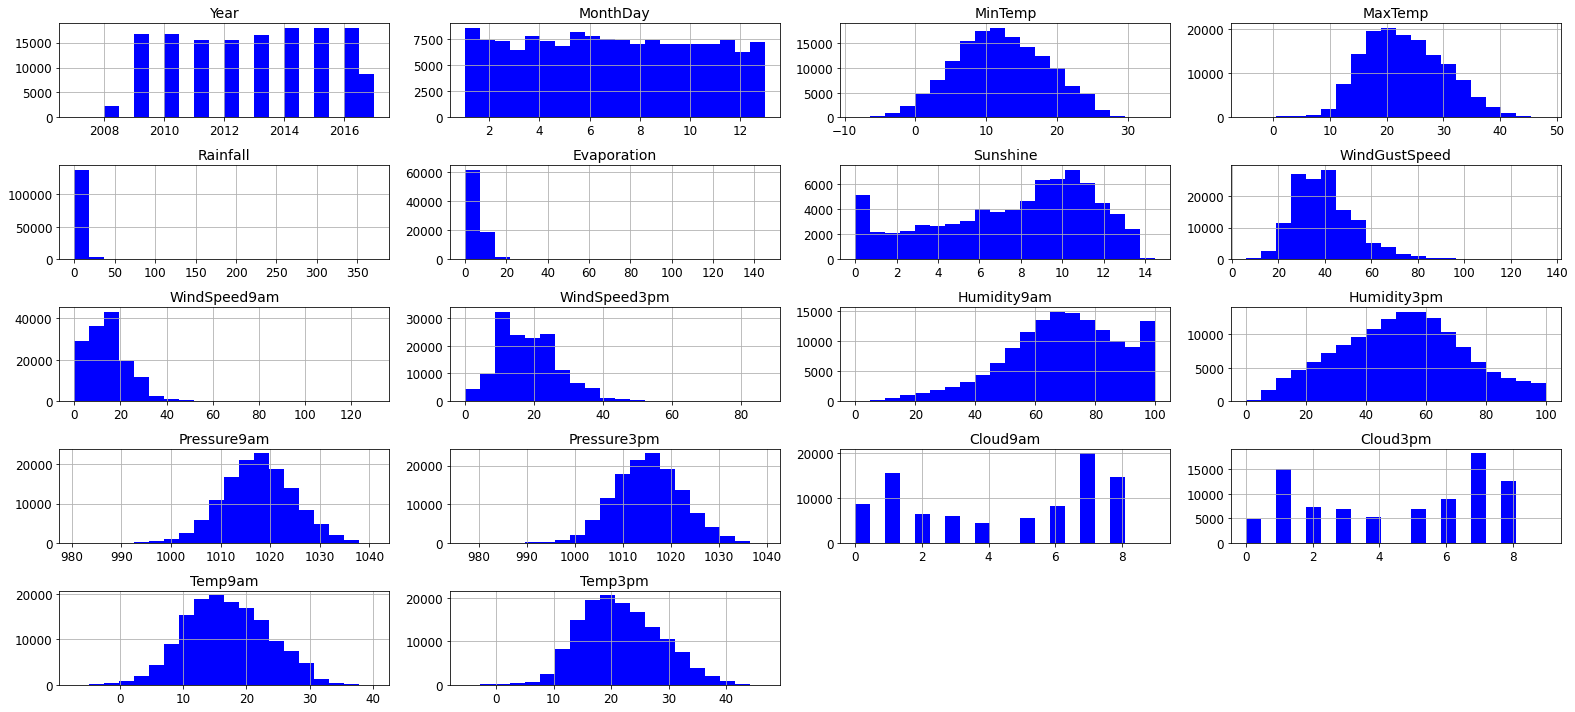

In [12]:
# Visualizamos la distribución de cada columna
def display_distributions(dataset_):
    fig = dataset_.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10), color='blue', bins=20)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
display_distributions(dataset_)

In [13]:
print(pd.value_counts(dataset_.Year))
# Se descartan los años 2007 y 2008 por incompletud.

2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2270
2007       61
Name: Year, dtype: int64


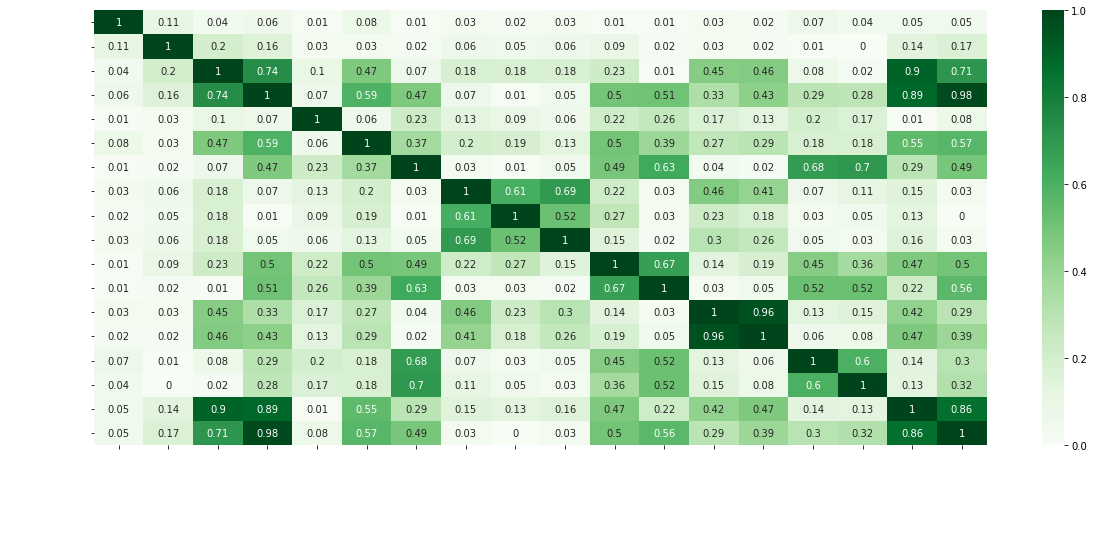

In [14]:
# Graficamos la matriz de colinearidad
correlation_matrix = dataset_[dataset_.columns].corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
[t.set_color('white') for t in axes.xaxis.get_ticklabels()]
[t.set_color('white') for t in axes.yaxis.get_ticklabels()]
sns.heatmap(data=np.abs(correlation_matrix), annot=True,ax=axes,cmap='Greens');

In [5]:
# muy alta correlación lineal entre Temp9am y MinTemp. También entre Temp3pm y MaxTemp, como es lógico. Podríamos eliminar dos variables
# falta ver que sucede con las categoricas

In [18]:
# Visualizamos los datos de cada columna
def display_boxplot(dataset):
    fig = dataset.boxplot(figsize=(22,10))

NameError: name 'Pressure9am' is not defined

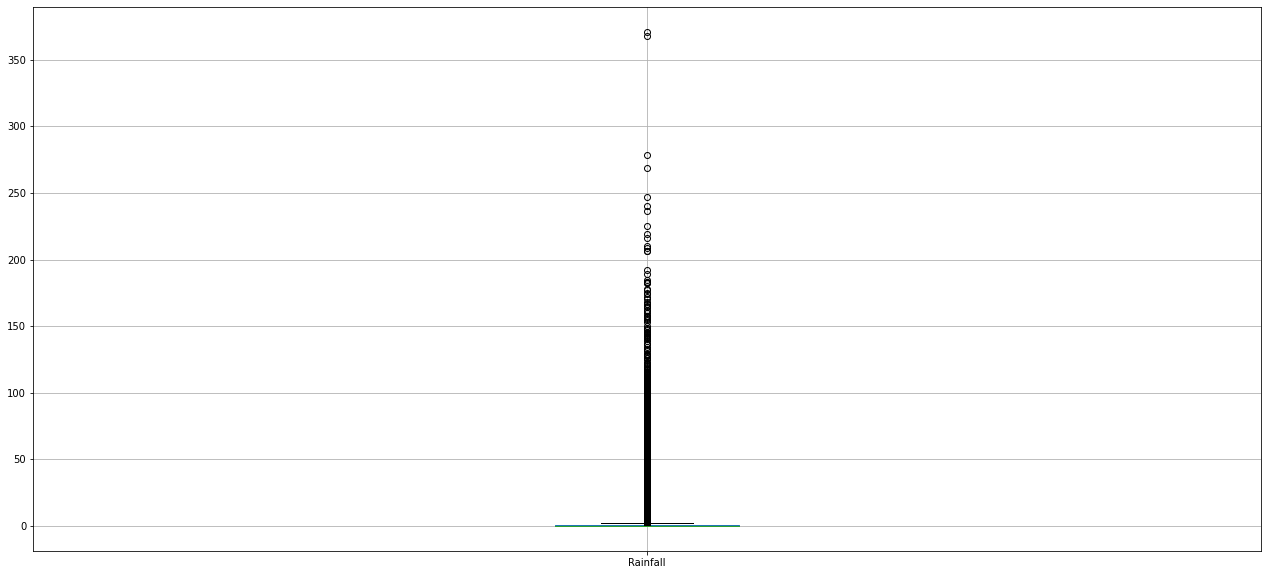

In [40]:
display_boxplot(pd.DataFrame(dataset_["Rainfall"]))
display_boxplot(pd.DataFrame(dataset_[Pressure9am,Pressure3am]))

In [44]:
"""for column in dataset_:
    if  column not in ["Rainfall","Pressure9am","Pressure3am"]:
        display_boxplot(pd.DataFrame(dataset_[column]))
    elif column == "Rainfall":
        display_boxplot(pd.DataFrame(dataset_[column]))
    else:
        display_boxplot(pd.DataFrame(dataset_[column]))"""

       
display_boxplot(dataset_.loc[:, pd.DataFrame(dataset_.columns) not in ["Rainfall","Pressure9am","Pressure3am"]])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().